In [1]:
from qiskit import *

In [2]:
from qiskit.tools.visualization import plot_histogram
secretnum = '0011'

In [3]:
circuit = QuantumCircuit(len(secretnum)+1,len(secretnum))

In [4]:
circuit.h(range(len(secretnum)))

In [5]:
circuit.x(len(secretnum))
circuit.h(len(secretnum))

In [6]:
circuit.barrier()

In [7]:
for ii, yesno in enumerate(reversed(secretnum)):
    if yesno=='1':
        circuit.cx(ii,len(secretnum))

In [8]:
circuit.barrier()
circuit.h(range(len(secretnum)))
circuit.barrier()
circuit.measure(range(len(secretnum)),range(len(secretnum)))

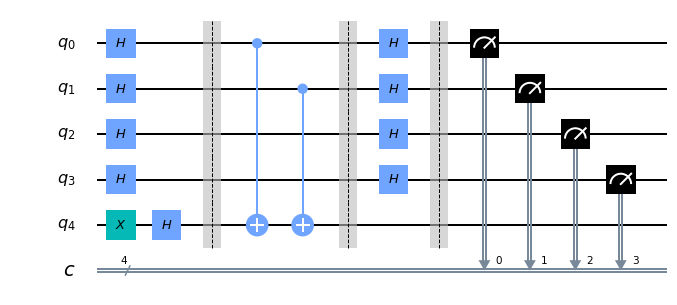

In [9]:
circuit.draw(output='mpl')

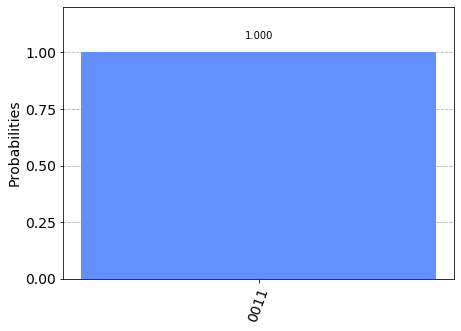

In [10]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=1).result()
plot_histogram(result.get_counts())

In [11]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
provider = IBMQ.get_provider(hub='ibm-q')

In [13]:
device = provider.get_backend('ibmqx2')

In [15]:
job = execute(circuit, backend = device, shots = 1)
from qiskit.tools.monitor import job_monitor

In [16]:
job_monitor(job)

Job Status: job has successfully run


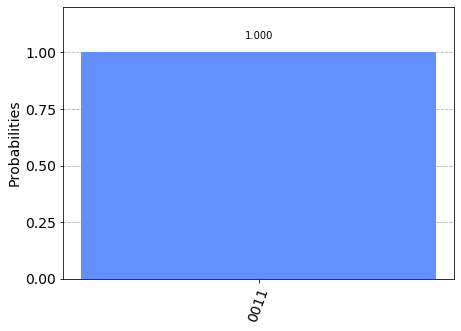

In [18]:
plot_histogram(job.result().get_counts(circuit))